线性回归模型

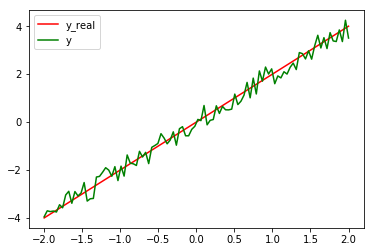

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
# 创建数据
N = 100
np.random.seed(0)
x = np.linspace(-2,2,N)
# 真实数据
y_real = 2 * x # 无偏差模型
# 虚拟数据
y = y_real + np.random.rand(N) - np.array(0.5)

x_mat = x[:,None]


# 展示图像

plt.plot(x,y_real,color = 'red')
plt.plot(x,y,color = 'green')
plt.legend(['y_real','y'])
plt.show()

In [3]:
x_new_1 = np.concatenate((x_mat,np.ones([N,1])),axis=1)  #因为假设了偏差，所以采用y = ax+b的方法，求解b值
x_new_2 = x_mat  #这里就是假设没加噪音，采用y = ax的方法

# 求解逆矩阵
x_inv_1 = np.linalg.inv(x_new_1.T @ x_new_1)
x_inv_2 = np.linalg.inv(x_new_2.T @ x_new_2)

# 求解转置
anwser_1 = x_inv_1 @ x_new_1.T @ y
anwser_2 = x_inv_2 @ x_new_2.T @ y

w_no_noise = anwser_2[0]
w_has_noise = anwser_1[0]
b_has_noise = anwser_1[1]
print('没有噪音的参数预测值为',w_no_noise)
print('有噪音的参数预测值为',w_has_noise,'\n','有噪音的b值预测为',b_has_noise)

没有噪音的参数预测值为 1.9374703284576391
有噪音的参数预测值为 1.9374703284576391 
 有噪音的b值预测为 -0.027206160487482256


In [5]:
# 求解均方误差mse
def get_mse(a,b):
    all = np.sum(a - b) ** 2
    return all / len(a)

# 计算MAPe
def get_mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

RESULT
有噪音，当y = ax + b时刻

均方误差为mse： 6.213512223779875e-31
mape为： 29.036808253828823


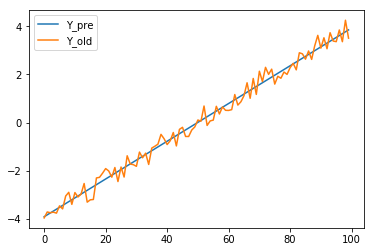

In [6]:
# 原始的噪音y值
Y = y
# 计算出的a与b的值
a = w_has_noise
b = b_has_noise

#图像进行区分
Y_noise = x_new_1 @ anwser_1
'''预测数据'''
# print(Y_noise)
'''原始数据'''
# print(y)

print('均方误差为mse：',get_mse(Y,Y_noise))
print('mape为：',get_mape(Y,Y_noise))

plt.plot(Y_noise,label = 'pre')
plt.plot(y,label = 'old')
plt.legend(['Y_pre','Y_old'])
plt.show()

没有噪音时,y = a * x

均方误差为mse： 9.984020831703431e-33
mape为： 3.1264835771180444


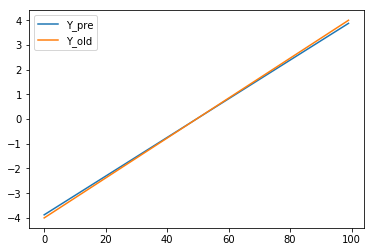

In [7]:
# 原始的噪音y值
Y_real = y_real
# 计算出的a与b的值
a = w_no_noise

#图像进行区分
Y_no_noise = x_new_2 @ anwser_2
'''预测数据'''
# print(Y_real)
'''原始数据'''
# print(Y_no_noise)

print('均方误差为mse：',get_mse(Y_real,Y_no_noise))
print('mape为：',get_mape(Y_real,Y_no_noise))

plt.plot(Y_no_noise,label = 'pre')
plt.plot(Y_real,label = 'old')
plt.legend(['Y_pre','Y_old'])
plt.show()

使用sklearn库进行预测

模型的预测值 [1.93747033 0.        ]
模型预测的a值： 1.9374703284576387
b值为 -0.027206160487482266


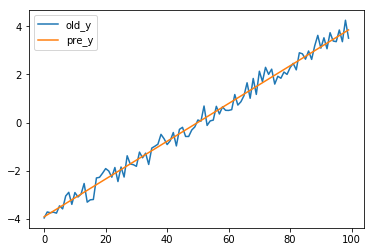

模型的预测值 [1.93747033]
模型预测的a值： 1.9374703284576387


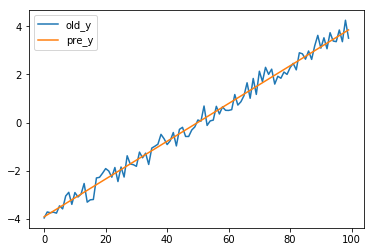

In [11]:
from sklearn.metrics import accuracy_score
from sklearn import linear_model # 待偏差的模型

model_I=  linear_model.LinearRegression(fit_intercept=True) #加载模型

model_I.fit(x_new_1,y)

Y_sklearn_1 = model_I.predict(x_new_1)

print('模型的预测值',model_I.coef_)
print('模型预测的a值：',model_I.coef_[0])
print('b值为',model_I.intercept_)

plt.plot(y)
plt.plot(Y_sklearn_1)
plt.legend(['old_y','pre_y'])
plt.show()

# 无偏差模型
model_II = linear_model.LinearRegression()

model_II.fit(x_new_2,y)

Y_sklearn_2 = model_II.predict(x_new_2)

print('模型的预测值',model_II.coef_)
print('模型预测的a值：',model_II.coef_[0])

plt.plot(y)
plt.plot(Y_sklearn_2)
plt.legend(['old_y','pre_y'])
plt.show()

总结
本次作业学习了
        1.使用numpy随机生成数据
        2.手写求解回归模型的代码
        3.使用sklearn载入模型得到回归方程的参数
        4.将模型的数据进行展示(图与一系列参数)
心得
        1.学会了用@代替np.dot()函数，更了解了线性回归的原理。
        2.numpy库的使用也更加熟练
        3.学会了sklearn库中的线性回归方法